**Importing libraries and dataset**









In [1]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 31.7 MB/s 
     |████████████████████████████████| 57 kB 5.1 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 112 kB 62.7 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 212 kB 64.8 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 2.3 MB 62.0 MB/s 
     |████████████████████████████████| 270 kB 57.4 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 80 kB 9.6 MB/s 
     |████████████████████████████████| 68 kB 7.1 MB/s 
     |████████████████████████████████| 43 kB 907 kB/s 
     |████████████████████████████████| 856 kB 49.9 MB/s 
     |████████████████████████████████| 4.0 MB 63

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import gradio as gr
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel("/content/drive/MyDrive/ML PROJECT/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

**Studying dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(229), object(2)
memory usage: 3.4+ MB


In [ ]:
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0.0,1.0,60th,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0.0
1,0.0,1.0,60th,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0.0
2,0.0,1.0,60th,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0.0
3,0.0,1.0,60th,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0.0
4,0.0,1.0,60th,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384.0,0.0,50th,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0.0
1921,384.0,0.0,50th,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0.0
1922,384.0,0.0,50th,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0.0
1923,384.0,0.0,50th,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0.0


In [ ]:
df.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

In [ ]:
df.isnull().sum().sum()

223863

In [ ]:
df.shape

(1925, 231)

**Data preprocessing and visualization**

In [ ]:
df.dtypes

PATIENT_VISIT_IDENTIFIER      float64
AGE_ABOVE65                   float64
AGE_PERCENTIL                  object
GENDER                        float64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                           float64
Length: 231, dtype: object

Outside the ICU:  1410
Inside the ICU:  515


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


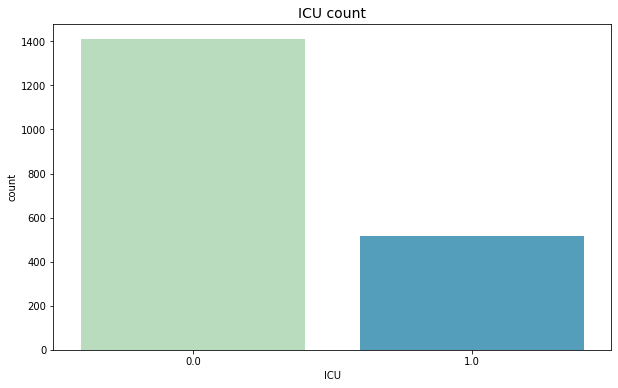

In [ ]:
#Number of people in icu
plt.figure(figsize=(10,6))
plt.title('ICU count', fontsize=14)
sns.countplot(df['ICU'], palette='GnBu')

print('Outside the ICU: ',len(df[df['ICU']==0]))
print('Inside the ICU: ',len(df[df['ICU']==1]))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


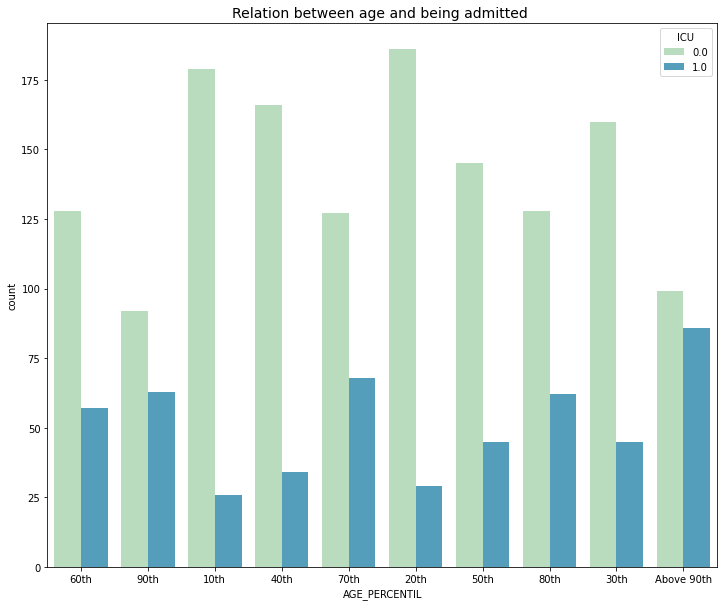

In [ ]:
#finding relation between age and admitting to icu
plt.figure(figsize=(12,10))

plt.title('Relation between age and being admitted ', fontsize=14)
sns.countplot(df['AGE_PERCENTIL'], hue='ICU', data=df, palette='GnBu')

Finding the categorical columns

In [ ]:
cat = df.select_dtypes(include=['object']).copy()

In [ ]:
cat.columns

Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')

In [ ]:
cat['AGE_PERCENTIL'].value_counts()

20th          215
10th          205
30th          205
40th          200
70th          195
50th          190
80th          190
60th          185
Above 90th    185
90th          155
Name: AGE_PERCENTIL, dtype: int64

In [ ]:
cat['WINDOW'].value_counts()

0-2         385
2-4         385
4-6         385
6-12        385
ABOVE_12    385
Name: WINDOW, dtype: int64

**Encoding categorical data**

In [5]:
def cat_window(window):
    if window == "ABOVE_12":
        return(13)
    else:
        return(int((window.split("-")[1])))


df['WINDOW'] = df['WINDOW'].apply(lambda x: cat_window(x))

In [6]:
df['WINDOW']

0        2
1        4
2        6
3       12
4       13
        ..
1920     2
1921     4
1922     6
1923    12
1924    13
Name: WINDOW, Length: 1925, dtype: int64

In [7]:
def cat_percentil(percentil):
    if percentil == "Above 90th":
        return(100)
    else:
        return(int("".join(c for c in str(percentil) if c.isdigit())))

        


# checking AGE_PERCENTIL 
df['AGE_PERCENTIL'] = df['AGE_PERCENTIL'].apply(lambda x: cat_percentil(x))

In [8]:
df['AGE_PERCENTIL']

0       60
1       60
2       60
3       60
4       60
        ..
1920    50
1921    50
1922    50
1923    50
1924    50
Name: AGE_PERCENTIL, Length: 1925, dtype: int64

**Handling nulls**

In [ ]:
print("Nulls:",df.isnull().sum().sum())

Nulls: 223863


In [9]:
#using interpolate to remove nulls
df.interpolate(inplace = True)

In [21]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
#final shape of dataset
print("Shape:",df.shape)

Shape: (1923, 231)


**Feature Selection**

*Dropping columns using correlation*

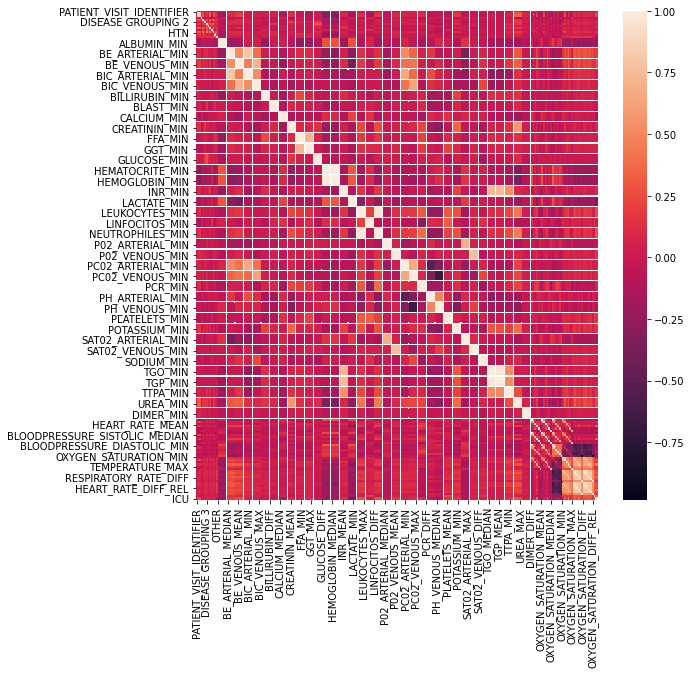

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr())

In [ ]:
df.corr()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,1.000000,-0.028872,0.021119,0.058507,0.075817,0.044603,0.040428,-0.017318,0.013963,0.022760,...,-0.012243,-0.055174,-0.017114,-0.029878,-0.055699,-0.027428,-0.011715,-0.055232,-0.001816,-0.048717
AGE_ABOVE65,-0.028872,1.000000,0.869228,0.050638,0.268034,0.068034,0.158659,0.016887,0.303939,-0.020421,...,0.072866,0.070677,0.089112,0.101394,0.036752,0.095535,0.074056,0.071970,0.001120,0.213035
AGE_PERCENTIL,0.021119,0.869228,1.000000,0.074644,0.297554,0.076593,0.132523,0.003761,0.334598,-0.055577,...,0.080719,0.050838,0.100409,0.115340,0.031007,0.106423,0.082059,0.051973,0.000249,0.238239
GENDER,0.058507,0.050638,0.074644,1.000000,0.038869,-0.032206,-0.074060,-0.054430,-0.019711,-0.012844,...,-0.049697,-0.016291,0.005639,0.000003,-0.042720,-0.023034,-0.048970,-0.016771,-0.000802,-0.066056
DISEASE GROUPING 1,0.075817,0.268034,0.297554,0.038869,1.000000,0.194173,0.240525,0.010704,0.335059,0.172116,...,0.045871,0.003059,0.055689,0.062434,0.052607,0.055925,0.047087,0.003226,0.034093,0.061613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RESPIRATORY_RATE_DIFF_REL,-0.027428,0.095535,0.106423,-0.023034,0.055925,0.084179,0.089687,0.022102,0.079837,0.055683,...,0.772791,0.535952,0.776503,0.805231,0.759707,1.000000,0.773362,0.535973,0.280020,0.360440
TEMPERATURE_DIFF_REL,-0.011715,0.074056,0.082059,-0.048970,0.047087,0.094731,0.086383,0.014444,0.053211,0.069103,...,0.999888,0.519855,0.790734,0.830297,0.809250,0.773362,1.000000,0.520109,0.316675,0.233420
OXYGEN_SATURATION_DIFF_REL,-0.055232,0.071970,0.051973,-0.016771,0.003226,0.074079,0.053021,0.011559,0.019419,0.053907,...,0.520216,0.999842,0.538049,0.556606,0.530451,0.535973,0.520109,1.000000,0.169303,0.183340
WINDOW,-0.001816,0.001120,0.000249,-0.000802,0.034093,0.036181,0.046926,0.008243,0.028031,0.052697,...,0.316734,0.169222,0.303148,0.324350,0.309540,0.280020,0.316675,0.169303,1.000000,0.316412


In [22]:
def correlate(ds,threshold):
  col_corr = set()
  cor_matrix = ds.corr()
  for i in range(len(cor_matrix.columns)):
    for j in range(i):
      if abs(cor_matrix.iloc[i,j]) > threshold:
        col_corr.add(cor_matrix.columns[i])
  return col_corr

In [23]:
cor_features = correlate(df,0.9)
print(cor_features)
print(len(cor_features))

set()
0


In [24]:
df.drop(cor_features,axis =1,inplace = True)

dropping constant and quasi constant columns

In [25]:
var = VarianceThreshold(threshold = 0.01)
var.fit(df)
concol1 = [column for column in df.columns 
          if column not in df.columns[var.get_support()]]
df.drop(concol1,axis=1,inplace = True)


In [26]:
print(concol1)

[]


In [27]:

var = VarianceThreshold(threshold=0)
var.fit(df)
concol = [column for column in df.columns 
          if column not in df.columns[var.get_support()]]
df.drop(concol,axis=1,inplace = True)


In [ ]:
print(df.shape)

(1923, 62)


**Splitting dataset**

In [28]:
y = df.ICU

In [ ]:
y

2       0.0
3       0.0
4       1.0
5       1.0
6       1.0
       ... 
1920    0.0
1921    0.0
1922    0.0
1923    0.0
1924    0.0
Name: ICU, Length: 1923, dtype: float64

In [29]:
X = df.drop('ICU',axis = 1)

In [ ]:
X

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,WINDOW
2,0.0,1.0,60,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.210811,-0.109453,-0.333333,-0.014493,0.657895,-0.779710,-0.628499,-0.607843,-1.000000,6
3,0.0,1.0,60,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.037838,0.094527,-0.030303,-0.275362,0.736842,-0.559420,-0.256997,-0.215686,-1.000000,12
4,0.0,1.0,60,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.286486,0.298507,0.272727,0.362319,0.947368,-0.339130,0.114504,0.176471,-0.238095,13
5,1.0,1.0,90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.329730,-0.059701,0.636364,-0.275362,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2
6,1.0,1.0,90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.329730,-0.388060,-0.454545,-0.275362,0.894737,-1.000000,-1.000000,-1.000000,-1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384.0,0.0,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.502703,-0.164179,-0.575758,0.246377,0.789474,-1.000000,-1.000000,-1.000000,-1.000000,2
1921,384.0,0.0,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.567568,-0.298507,-0.636364,-0.072464,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,4
1922,384.0,0.0,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.459459,-0.343284,-0.636364,-0.072464,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,6
1923,384.0,0.0,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.567568,-0.358209,-0.696970,0.043478,0.473684,-1.000000,-1.000000,-1.000000,-1.000000,12


Train test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(1538, 61)

In [ ]:
X_test.shape

(385, 61)

In [ ]:
X_train

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,WINDOW
801,160.0,0.0,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.275676,-0.149254,-0.515152,-0.101449,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,4
1028,205.0,1.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.459459,-0.507463,-0.575758,-0.507246,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,12
1889,377.0,0.0,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.178378,-0.388060,-0.454545,0.391304,0.947368,-0.443478,-0.557252,-0.764706,-0.357143,13
825,165.0,0.0,30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.421622,0.029851,-0.242424,0.159420,0.710526,-0.686957,-0.526718,-0.588235,-0.619048,2
567,113.0,1.0,100,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.056757,-0.388060,-0.469697,0.224638,0.907895,-0.908696,-0.858779,-0.926471,-0.833333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,167.0,0.0,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.581081,-0.417910,-0.166667,0.057971,0.921053,-0.604348,-0.740458,-0.367647,-0.726190,6
1218,243.0,1.0,100,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.610811,-0.328358,0.454545,-0.246377,0.842105,-0.947826,-0.893130,-0.470588,-0.738095,12
1655,331.0,1.0,70,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,-0.062162,-0.227612,-0.469697,0.036232,0.802632,-0.426087,-0.404580,-0.750000,-0.553571,2
561,112.0,0.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.091892,0.022388,0.484848,0.463768,0.894737,-0.434783,-0.404580,0.058824,-0.488095,4


In [ ]:
X_test

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,WINDOW
622,124.0,0.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.567568,-0.328358,-0.439394,-0.007246,0.750000,-0.956522,-0.935115,-0.897059,-0.958333,6
822,164.0,1.0,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.562162,-0.470149,-0.636364,-0.333333,0.763158,-0.965217,-0.862595,-1.000000,-1.000000,6
669,133.0,0.0,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.264865,-0.343284,-0.454545,-0.043478,0.947368,-0.426087,-0.541985,-0.705882,-0.738095,13
746,149.0,1.0,100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.064865,-0.231343,0.030303,-0.043478,0.921053,-0.530435,-0.587786,-0.382353,-0.607143,4
1281,256.0,0.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.275676,-0.432836,-0.515152,-0.101449,0.789474,-1.000000,-1.000000,-1.000000,-1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,41.0,1.0,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.048649,-0.791045,-0.212121,-0.304348,1.000000,-0.617391,-0.908397,-1.000000,-0.666667,4
1303,260.0,0.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.308108,-0.194030,-0.272727,-0.333333,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,12
221,44.0,0.0,40,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,-0.445045,0.019900,-0.474747,0.275362,0.807018,-0.756522,-0.730280,-0.882353,-0.730159,4
993,198.0,0.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.448649,-0.283582,-0.515152,0.304348,0.684211,-0.843478,-0.832061,-1.000000,-0.833333,12


In [20]:
y_train

219     0.0
1353    1.0
1667    0.0
667     0.0
1027    0.0
       ... 
835     0.0
1216    1.0
1653    0.0
559     1.0
684     1.0
Name: ICU, Length: 1540, dtype: float64

**Feature Scaling**

In [31]:
Standardisation = preprocessing.StandardScaler()
xtrain = Standardisation.fit_transform(X_train)
xtest = Standardisation.fit_transform(X_test)

In [ ]:
xtrain

array([[-0.30044362, -0.93941308, -0.11346623, ..., -0.72974486,
        -0.86159472, -0.7837439 ],
       [ 0.10806904,  1.06449444,  0.23625534, ..., -0.72974486,
        -0.86159472,  1.05165483],
       [ 1.66949524, -0.93941308, -1.16263097, ..., -0.17975196,
         1.37318624,  1.28107967],
       ...,
       [ 1.25190451,  1.06449444,  0.58597692, ..., -0.1453774 ,
         0.6903365 , -1.24259358],
       [-0.73619047, -0.93941308, -0.46318781, ...,  1.74522319,
         0.91795308, -0.7837439 ],
       [-0.50923899,  1.06449444,  0.9356985 , ...,  0.64523739,
        -0.11666774, -0.7837439 ]])

In [ ]:
xtest

array([[-0.56506464, -0.92247577, -0.79122325, ..., -0.48640108,
        -0.70521719, -0.31005118],
       [-0.21529192,  1.08403932,  0.5871521 , ..., -0.73039532,
        -0.85230268, -0.31005118],
       [-0.48636578, -0.92247577, -0.10203558, ..., -0.03326892,
         0.07223471,  1.28763127],
       ...,
       [-1.26461008, -0.92247577, -0.44662942, ..., -0.45154476,
         0.100251  , -0.76653188],
       [ 0.08201489, -0.92247577, -1.48041093, ..., -0.73039532,
        -0.2639607 ,  1.05939092],
       [ 1.00016828, -0.92247577, -0.44662942, ..., -0.5212574 ,
         0.32438128, -0.76653188]])

**models**

*Using svc*

In [32]:
from sklearn import metrics
# Building a Support Vector Machine on train data
svc_model = SVC()
svc_model.fit(xtrain, y_train)
  
prediction = svc_model .predict(xtest)
print(metrics.accuracy_score(y_test,prediction)*100)

91.42857142857143


trying to improve accuracy using gridsearch

In [ ]:
'''
# defining parameter range
param_grid = {'C': [0.1, 1,5, 10,50, 100,500, 1000],
              'gamma': [1, 0.1,0.5, 0.01,0.05, 0.001,0.005, 0.0001],
              'kernel' : ['rbf','poly','sigmoid']
}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(xtrain, y_train)'''

"\n# defining parameter range\nparam_grid = {'C': [0.1, 1,5, 10,50, 100,500, 1000],\n              'gamma': [1, 0.1,0.5, 0.01,0.05, 0.001,0.005, 0.0001],\n              'kernel' : ['rbf','poly','sigmoid']\n}\n \ngrid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)\n# fitting the model for grid search\ngrid.fit(xtrain, y_train)"

In [ ]:
'''# best parameter after tuning
print(grid.best_params_)
 
# model after hyper-parameter tuning
print(grid.best_estimator_)'''

'# best parameter after tuning\nprint(grid.best_params_)\n \n# model after hyper-parameter tuning\nprint(grid.best_estimator_)'

using the best parameters from the above gridsearch result

In [33]:
svc_model = SVC(C = 10,kernel = 'rbf',gamma = 0.01)
svc_model.fit(xtrain, y_train)
  
prediction = svc_model.predict(xtest)
print("Improved Accuracy is",svc_model.score(xtest, y_test)*100)

Improved Accuracy is 92.98701298701299


Decision Tree

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(xtrain, y_train)

In [ ]:
predicted_value = model.predict(xtest)

In [ ]:
print("ACCURACY OF THE MODEL: ",accuracy_score(y_test, predicted_value)*100)

ACCURACY OF THE MODEL:  81.2987012987013


In [ ]:
predicted_value = model.predict(xtrain)

In [ ]:
print("ACCURACY OF THE MODEL: ",accuracy_score(y_train, predicted_value)*100)

ACCURACY OF THE MODEL:  100.0


*Random forest*

In [ ]:
# creating a RF classifier
clf = RandomForestClassifier()
clf.fit(xtrain, y_train)
y_pred = clf.predict(xtest)
print("ACCURACY OF THE MODEL: ",accuracy_score(y_test, y_pred)*100)

ACCURACY OF THE MODEL:  90.12987012987013


In [ ]:
'''
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)'''

"\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\nmax_features = ['auto', 'sqrt']\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\nmin_samples_split = [2, 5, 10]\nmin_samples_leaf = [1, 2, 4]\nbootstrap = [True, False]\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\nprint(random_grid)"

In [ ]:
'''rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(xtrain, y_train)'''

'rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\nrf_random.fit(xtrain, y_train)'

In [ ]:
'''print(rf_random.best_estimator_)'''

'print(rf_random.best_estimator_)'

In [ ]:
clf = RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000)
clf.fit(xtrain, y_train)
y_pred = clf.predict(xtest)
print("ACCURACY OF THE MODEL: ",accuracy_score(y_test, y_pred)*100)

ACCURACY OF THE MODEL:  90.9090909090909


In [ ]:
y_pred = clf.predict(xtrain)
print("ACCURACY OF THE MODEL: ",accuracy_score(y_train, y_pred)*100)

ACCURACY OF THE MODEL:  100.0


KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(xtrain,y_train)
predictedlabels = neigh.predict(xtest)
accuracy_score(y_test, predictedlabels)

0.8597402597402597

In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [ ]:
clf = GridSearchCV(neigh, hyperparameters, cv=10)
best_model = clf.fit(xtrain,y_train)

In [ ]:
y_pred = best_model.predict(xtest)

In [ ]:
y_pred = best_model.predict(xtrain)

In [ ]:
print(accuracy_score(y_test, y_pred))

ValueError: ignored

In [ ]:
print(accuracy_score(y_train, y_pred))

**Deployment**

In [34]:
df.drop("ICU",axis = 1,inplace = True)

In [35]:
df.index.name = "index"

In [36]:
index = [x for x in range(1,1924)]

In [37]:
df.index = index

In [ ]:
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,WINDOW
1,0.0,1.0,60,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.210811,-0.109453,-0.333333,-0.014493,0.657895,-0.779710,-0.628499,-0.607843,-1.000000,6
2,0.0,1.0,60,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.037838,0.094527,-0.030303,-0.275362,0.736842,-0.559420,-0.256997,-0.215686,-1.000000,12
3,0.0,1.0,60,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.286486,0.298507,0.272727,0.362319,0.947368,-0.339130,0.114504,0.176471,-0.238095,13
4,1.0,1.0,90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.329730,-0.059701,0.636364,-0.275362,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2
5,1.0,1.0,90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.329730,-0.388060,-0.454545,-0.275362,0.894737,-1.000000,-1.000000,-1.000000,-1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,384.0,0.0,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.502703,-0.164179,-0.575758,0.246377,0.789474,-1.000000,-1.000000,-1.000000,-1.000000,2
1920,384.0,0.0,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.567568,-0.298507,-0.636364,-0.072464,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,4
1921,384.0,0.0,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.459459,-0.343284,-0.636364,-0.072464,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,6
1922,384.0,0.0,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.567568,-0.358209,-0.696970,0.043478,0.473684,-1.000000,-1.000000,-1.000000,-1.000000,12


pickling the model

In [38]:
pickle.dump(svc_model,open('csv.sav','wb'))

In [39]:
model = pickle.load(open('csv.sav','rb'))

Deployement using gradio

In [40]:
def predict_res(id):
  x = df.loc[id].to_numpy()
  a_stand = (x - X_train.mean())/(X_train.std())
  if model.predict([a_stand]) == 0:
    return "No bed required"
  elif model.predict([a_stand]) == 1:
    return "Bed required"

In [41]:
title = "<u>Prediction of ICU requirement</u>"
description = """
<center>
The bot was trained to predict the requirement of ICU bed for a patient. Give the ID of the patient
<img src="https://cdn.cnn.com/cnnnext/dam/assets/200513170740-coronavirus-questions-answered-illustration-super-169.jpg" width="600" height="600">
</center>
"""

In [42]:
outputs = gr.outputs.Textbox()

/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [43]:
css_code='body{background-image:url("https://preview.pixlr.com/images/800wm/1143/1/1143151214.jpg");}'

In [44]:
gr.Interface(predict_res, inputs="number", outputs=outputs,title = title,description = description,css = css_code).launch(share = True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://29818.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f9b8b2e7c90>,
 'http://127.0.0.1:7860/',
 'https://29818.gradio.app')